# It is importnat to install before running any PennyLane code.

In [46]:
pip install pennylane --upgrade

In [47]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt


# T.1 Tutorial

Codercise T.1. Complete the function in the code cell below to add together two numbers. Press the "Submit" button to send your work to the grader.

In [48]:
def add_numbers(x, y):
    """A simple function to add two numbers.

    Args:
        x (float): a number
        y (float): another number

    Returns:
        float: The sum of x and y.
    """

    ##################
    # YOUR CODE HERE #
    add = x + y
    return add
    ##################

    return x + y

In [49]:
add_numbers(2, complex(1,3))

(3+3j)

Codercise T.2 Find and return the maximum value of a provided array.

In [50]:

def find_max(x):
    """A simple function to find the largest value in a numpy array.

    Args:
        x (array[float]): an array of numbers of size n

    Returns:
        float: The maximum value in x.
    """

    ##################
    # YOUR CODE HERE #
    return np.max(x)
    ##################


In [51]:
find_max( [1,2,5,6,10] )

10

# I.1 All about qubits


Codercise I.1.1. Suppose we are given an unnormalized quantum state

$|\psi\rangle = \alpha |0\rangle + \beta |1 \rangle$, $~~~~~~|\alpha|^2 +|\beta|^2=1$

We can turn this into an equivalent, valid quantum state by normalizing it. Write a function that, given $\alpha$ and $\beta$, normalizes this state to

$|\psi^\prime \rangle= \alpha^\prime |0\rangle + \beta^\prime |1 \rangle$, $~~~~~~|\alpha^\prime|^2 +|\beta^\prime|^2=1$.


In [52]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1
    psi = alpha*ket_0 + beta*ket_1
    normalize = np.sqrt(abs(alpha)**2 + abs(beta)**2)
    psi = psi/normalize
    return psi
    # RETURN A VECTOR
    pass


In [53]:
normalize_state( complex(1, 2), complex(5, 1) )

array([0.1796053 +0.3592106j, 0.89802651+0.1796053j])

Codercise I.1.2 Write a function to compute the inner product between two arbitrary states. Then, use it to verify that  and  form an orthonormal basis, i.e., the states are normalized and orthogonal.

In [54]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (array[complex]): A normalized quantum state vector
        state_2 (array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    ##################
    # YOUR CODE HERE #
    state_1 = np.conjugate(state_1)
    i_p = np.vdot(state_1, state_2)
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT

    return  i_p


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


Codercise I.1.3. The function below takes a quantum state vector as input. Complete the function to simulate the outcomes of an arbitrary number of quantum measurements, i.e., return a list of samples  or  based on the probabilities given by the input state.

In [55]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    ket_0 = np.array([1, 0])
    ket_1 = np.array([0, 1])
    Prob_0 = abs(np.vdot(state, ket_0))**2
    Prob_1 = abs(np.vdot(state, ket_1))**2
    out_come = np.random.choice([0, 1], size = num_meas, p = [Prob_0, Prob_1])
    ##################

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES
    return out_come
    pass


In [56]:
state = np.array([0.8, 0.6])
measure_state(state,10)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

Codercise I.1.4. Complete the function below to apply the provided quantum operation U to an input state.

In [57]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (array[complex]): A normalized quantum state vector.

    Returns:
        array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    New_state =U@state
    return New_state
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    pass


In [58]:
state = np.array([0.8, 0.6])
apply_u( state )

array([0.98994949, 0.14142136])

Codercise I.1.5. Use the functions below to simulate a quantum algorithm that does the following:

1. Initialize a qubit in state
2. Apply the provided operation U
3. Simulate measuring the output state 100 times

You'll have to complete a function for initialization, but we've provided functions for the other two.

In [59]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ket_0 = np.array([1, 0])
    ##################

    # PREPARE THE STATE |0>
    return ket_0
    pass


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #
    state_0 = initialize_state()
    state = apply_u(state_0)
    return measure_state(state, 100)
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    pass


In [60]:
quantum_algorithm()

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

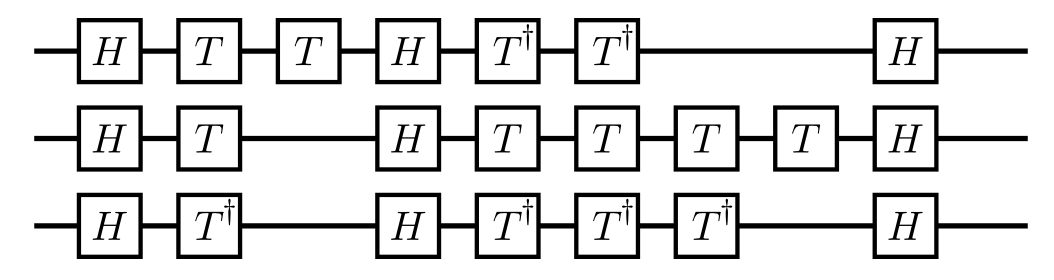# I.2 Quantum Circuits

Codercise I.2.1. The code below is a quantum function with all the gates from the above circuit (which we reproduce here for convenience). However, the gates are out of order! Re-arrange the lines of the function to match the order of operations in the circuit.

In [61]:
def my_circuit(theta, phi):
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])


Codercise I.2.2. Complete the quantum function in the PennyLane code below to implement the following quantum circuit. We'll then construct a QNode, and run the circuit on the provided device.



In [62]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)




    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

Codercise I.2.3. The quantum function below implements the circuit from the previous exercise. Apply a decorator to the quantum function to construct a QNode, then run it using the provided input parameters.

In [63]:
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
@qml.qnode(dev)
##################

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE

def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
# YOUR CODE HERE #
my_qnode = qml.QNode(my_circuit, dev)
# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS




tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

Codercise I.2.4. What is the depth of the circuit in the picture above?

In [64]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4
